# 

In [2]:
import keras
import urllib.request, json 
with urllib.request.urlopen("http://statistik.easycredit-bbl.de/XML/exchange/540/Schedule.php?type=json&saison=2017&fixedGamesOnly=0") as url:
    games = json.loads(url.read().decode())

    
    
arenakap = {486:6594,413:14500,433:4200,420:6150,415:6000,425:3300,430:6000,426:5002,540:3140,418:6200,421:4003,422:3603,483:3076,477:3447,428:3000,439:4200,517:3533,432:3132}

dataset=[]

for i in range(0,len(games['competition'][0]['spiel'])):
    datasetrow=[]     
    datasetrow.append(games['competition'][0]['spiel'][i]['home_id'])
    datasetrow.append(games['competition'][0]['spiel'][i]['gast_id'])
    datasetrow.append(int(games['competition'][0]['spiel'][i]['home_result']>games['competition'][0]['spiel'][i]['gast_result']))
    datasetrow.append(int(games['competition'][0]['spiel'][i]['zuschauer']))
    datasetrow.append(arenakap[int(games['competition'][0]['spiel'][i]['home_id'])])
    
    dataset.append(datasetrow)


# Umwandlung des Datasets in ein Numpy Array 
import numpy as np
# : bedeutet in diesem Fall auslesen aller zeilen
dataset=np.asarray(dataset)

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transformed_home_ids = encoder.fit_transform(dataset[:,0])


#ohne fit, damit die Teams eindeutig bleiben, nur transformation notwendig
transformed_gast_ids = encoder.transform(dataset[:,1])

# Umformung der Zuschauer in eine Spalte (vorher war es nur eine Zeile)
#print(np.reshape(dataset[:,3],(306,1)))

# Featurescaling der Zuschaueranzahl & Hallenkapazitäten
from sklearn.preprocessing import MinMaxScaler

arenaKap_scaler=MinMaxScaler()
arenaKap_scaler.fit([[0],[14500]]) #Maximum Berlin und 0 Minimum
#reshaping
transformed_zuschauer=arenaKap_scaler.transform(np.reshape(dataset[:,3],(306,1)))
transformed_kap=arenaKap_scaler.transform(np.reshape(dataset[:,4],(306,1)))


data=np.c_[transformed_home_ids,transformed_gast_ids,transformed_zuschauer,transformed_kap,dataset[:,2]]

# Importing the Keras libraries and packages 
from keras.models import Sequential
from keras.layers import Dense



In [11]:
import random
import time as tm
import datetime
import pickle
from keras.optimizers import Adam
      
        
def create_file_name():
    ts = tm.time()
    name = datetime.datetime.fromtimestamp(ts).strftime('%Y%m%d%H%M%S') + '_ann'
    return name

path='./Netze/'


for i in range(0,40):
    
    units1 = random.randrange(10,51,1) #
    units2 = random.randrange(10,21,1) 
    name_file=create_file_name()
    
    #opt=Adam(lr=learning_rate))
    
    # Initialising the ANN
    regressor = Sequential()

    # Adding the input layer and the first hidden layer
    regressor.add(Dense(units = units1, kernel_initializer = 'uniform', activation = 'relu', input_shape = (38,)))

    # Adding the second hidden layer
    regressor.add(Dense(units = units2, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

    #Summary anzeigen
    regressor.summary()

    # Compiling the ANN - wie soll es lernen
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

    # Fitting the ANN to the Training set 
    #input = data[:,0:4] output= (data[:,4]
    history = regressor.fit(data[:,0:38], data[:,38], batch_size = 10, epochs = 100, validation_split = 0.1)
    
    
    with open(path + name_file + '.pkl', 'wb') as output:
        ann_net = {'history_val_loss':history.history['val_loss'],'history_loss':history.history['loss'],'units1':units1,'units2':units2}
        pickle.dump(ann_net, output)
    
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 50)                1950      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 2,471
Trainable params: 2,471
Non-trainable params: 0
_________________________________________________________________
Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 1s 2ms/step - loss: 0.2499 - acc: 0.5382 - val_loss: 0.2498 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 177us/step - loss: 0.2494 - acc: 0.5418 - val_loss: 0.2493 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 162us/step - loss: 0.2480 - acc: 

275/275 [==============================] - 0s 185us/step - loss: 0.0526 - acc: 0.9600 - val_loss: 0.2068 - val_acc: 0.6452
Epoch 56/100
275/275 [==============================] - 0s 201us/step - loss: 0.0504 - acc: 0.9527 - val_loss: 0.2069 - val_acc: 0.6452
Epoch 57/100
275/275 [==============================] - 0s 200us/step - loss: 0.0483 - acc: 0.9600 - val_loss: 0.2057 - val_acc: 0.7419
Epoch 58/100
275/275 [==============================] - 0s 192us/step - loss: 0.0451 - acc: 0.9673 - val_loss: 0.2069 - val_acc: 0.6774
Epoch 59/100
275/275 [==============================] - 0s 197us/step - loss: 0.0446 - acc: 0.9600 - val_loss: 0.2112 - val_acc: 0.6452
Epoch 60/100
275/275 [==============================] - 0s 194us/step - loss: 0.0407 - acc: 0.9636 - val_loss: 0.2150 - val_acc: 0.7419
Epoch 61/100
275/275 [==============================] - 0s 187us/step - loss: 0.0395 - acc: 0.9709 - val_loss: 0.2172 - val_acc: 0.6774
Epoch 62/100
275/275 [==============================] - 0s 18

Epoch 10/100
275/275 [==============================] - 0s 153us/step - loss: 0.1662 - acc: 0.7527 - val_loss: 0.2108 - val_acc: 0.6774
Epoch 11/100
275/275 [==============================] - 0s 153us/step - loss: 0.1612 - acc: 0.7673 - val_loss: 0.2122 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 151us/step - loss: 0.1592 - acc: 0.7673 - val_loss: 0.2118 - val_acc: 0.6774
Epoch 13/100
275/275 [==============================] - 0s 151us/step - loss: 0.1562 - acc: 0.7709 - val_loss: 0.2134 - val_acc: 0.6774
Epoch 14/100
275/275 [==============================] - 0s 167us/step - loss: 0.1534 - acc: 0.7855 - val_loss: 0.2174 - val_acc: 0.6774
Epoch 15/100
275/275 [==============================] - 0s 166us/step - loss: 0.1519 - acc: 0.7927 - val_loss: 0.2192 - val_acc: 0.7097
Epoch 16/100
275/275 [==============================] - 0s 162us/step - loss: 0.1492 - acc: 0.7891 - val_loss: 0.2242 - val_acc: 0.6774
Epoch 17/100
275/275 [==========================

275/275 [==============================] - 0s 175us/step - loss: 0.0099 - acc: 0.9964 - val_loss: 0.2834 - val_acc: 0.5484
Epoch 71/100
275/275 [==============================] - 0s 176us/step - loss: 0.0094 - acc: 0.9964 - val_loss: 0.2834 - val_acc: 0.5484
Epoch 72/100
275/275 [==============================] - 0s 168us/step - loss: 0.0091 - acc: 0.9964 - val_loss: 0.2887 - val_acc: 0.5484
Epoch 73/100
275/275 [==============================] - 0s 161us/step - loss: 0.0092 - acc: 0.9964 - val_loss: 0.2879 - val_acc: 0.5806
Epoch 74/100
275/275 [==============================] - 0s 152us/step - loss: 0.0085 - acc: 0.9964 - val_loss: 0.2857 - val_acc: 0.5806
Epoch 75/100
275/275 [==============================] - 0s 153us/step - loss: 0.0083 - acc: 0.9964 - val_loss: 0.2962 - val_acc: 0.5484
Epoch 76/100
275/275 [==============================] - 0s 156us/step - loss: 0.0084 - acc: 0.9964 - val_loss: 0.2849 - val_acc: 0.5806
Epoch 77/100
275/275 [==============================] - 0s 15

Epoch 25/100
275/275 [==============================] - 0s 163us/step - loss: 0.1356 - acc: 0.8364 - val_loss: 0.2290 - val_acc: 0.6452
Epoch 26/100
275/275 [==============================] - 0s 172us/step - loss: 0.1326 - acc: 0.8436 - val_loss: 0.2301 - val_acc: 0.6774
Epoch 27/100
275/275 [==============================] - 0s 163us/step - loss: 0.1311 - acc: 0.8436 - val_loss: 0.2288 - val_acc: 0.6452
Epoch 28/100
275/275 [==============================] - 0s 178us/step - loss: 0.1280 - acc: 0.8400 - val_loss: 0.2284 - val_acc: 0.6452
Epoch 29/100
275/275 [==============================] - 0s 191us/step - loss: 0.1264 - acc: 0.8473 - val_loss: 0.2326 - val_acc: 0.6774
Epoch 30/100
275/275 [==============================] - 0s 156us/step - loss: 0.1244 - acc: 0.8509 - val_loss: 0.2338 - val_acc: 0.6452
Epoch 31/100
275/275 [==============================] - 0s 153us/step - loss: 0.1222 - acc: 0.8691 - val_loss: 0.2307 - val_acc: 0.6452
Epoch 32/100
275/275 [==========================

275/275 [==============================] - 0s 156us/step - loss: 0.0108 - acc: 0.9927 - val_loss: 0.2572 - val_acc: 0.6452
Epoch 86/100
275/275 [==============================] - 0s 154us/step - loss: 0.0103 - acc: 0.9927 - val_loss: 0.2528 - val_acc: 0.6774
Epoch 87/100
275/275 [==============================] - 0s 156us/step - loss: 0.0103 - acc: 0.9927 - val_loss: 0.2523 - val_acc: 0.6452
Epoch 88/100
275/275 [==============================] - 0s 151us/step - loss: 0.0098 - acc: 0.9927 - val_loss: 0.2458 - val_acc: 0.6774
Epoch 89/100
275/275 [==============================] - 0s 154us/step - loss: 0.0097 - acc: 0.9927 - val_loss: 0.2527 - val_acc: 0.6774
Epoch 90/100
275/275 [==============================] - 0s 153us/step - loss: 0.0091 - acc: 0.9927 - val_loss: 0.2482 - val_acc: 0.6774
Epoch 91/100
275/275 [==============================] - 0s 156us/step - loss: 0.0086 - acc: 0.9927 - val_loss: 0.2400 - val_acc: 0.6774
Epoch 92/100
275/275 [==============================] - 0s 15

Epoch 40/100
275/275 [==============================] - 0s 162us/step - loss: 0.1481 - acc: 0.8145 - val_loss: 0.2340 - val_acc: 0.6774
Epoch 41/100
275/275 [==============================] - 0s 158us/step - loss: 0.1473 - acc: 0.8182 - val_loss: 0.2349 - val_acc: 0.6774
Epoch 42/100
275/275 [==============================] - 0s 192us/step - loss: 0.1477 - acc: 0.8255 - val_loss: 0.2308 - val_acc: 0.7097
Epoch 43/100
275/275 [==============================] - 0s 172us/step - loss: 0.1461 - acc: 0.8182 - val_loss: 0.2341 - val_acc: 0.6452
Epoch 44/100
275/275 [==============================] - 0s 162us/step - loss: 0.1460 - acc: 0.8218 - val_loss: 0.2336 - val_acc: 0.7097
Epoch 45/100
275/275 [==============================] - 0s 158us/step - loss: 0.1454 - acc: 0.8255 - val_loss: 0.2296 - val_acc: 0.7097
Epoch 46/100
275/275 [==============================] - 0s 170us/step - loss: 0.1451 - acc: 0.8327 - val_loss: 0.2317 - val_acc: 0.7097
Epoch 47/100
275/275 [==========================

275/275 [==============================] - 0s 152us/step - loss: 0.0953 - acc: 0.9091 - val_loss: 0.2345 - val_acc: 0.6452
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 16)                624       
_________________________________________________________________
dense_47 (Dense)             (None, 14)                238       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 15        
Total params: 877
Trainable params: 877
Non-trainable params: 0
_________________________________________________________________
Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 1s 2ms/step - loss: 0.2499 - acc: 0.5273 - val_loss: 0.2499 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 194us/step - loss: 0.2496 - acc: 0.5418 - val_los

Epoch 55/100
275/275 [==============================] - 0s 203us/step - loss: 0.1027 - acc: 0.8764 - val_loss: 0.2391 - val_acc: 0.7097
Epoch 56/100
275/275 [==============================] - 0s 188us/step - loss: 0.1007 - acc: 0.8800 - val_loss: 0.2385 - val_acc: 0.6774
Epoch 57/100
275/275 [==============================] - 0s 170us/step - loss: 0.1001 - acc: 0.8800 - val_loss: 0.2375 - val_acc: 0.7097
Epoch 58/100
275/275 [==============================] - 0s 172us/step - loss: 0.0974 - acc: 0.8727 - val_loss: 0.2397 - val_acc: 0.6774
Epoch 59/100
275/275 [==============================] - 0s 186us/step - loss: 0.0968 - acc: 0.8727 - val_loss: 0.2426 - val_acc: 0.6774
Epoch 60/100
275/275 [==============================] - 0s 227us/step - loss: 0.0939 - acc: 0.8727 - val_loss: 0.2407 - val_acc: 0.6774
Epoch 61/100
275/275 [==============================] - 0s 186us/step - loss: 0.0936 - acc: 0.8800 - val_loss: 0.2427 - val_acc: 0.6452
Epoch 62/100
275/275 [==========================

275/275 [==============================] - 0s 172us/step - loss: 0.1909 - acc: 0.7345 - val_loss: 0.2081 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] - 0s 166us/step - loss: 0.1815 - acc: 0.7564 - val_loss: 0.2081 - val_acc: 0.7097
Epoch 11/100
275/275 [==============================] - 0s 172us/step - loss: 0.1746 - acc: 0.7636 - val_loss: 0.2044 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 192us/step - loss: 0.1695 - acc: 0.7600 - val_loss: 0.2001 - val_acc: 0.6774
Epoch 13/100
275/275 [==============================] - 0s 164us/step - loss: 0.1663 - acc: 0.7564 - val_loss: 0.2111 - val_acc: 0.6774
Epoch 14/100
275/275 [==============================] - 0s 157us/step - loss: 0.1636 - acc: 0.7782 - val_loss: 0.2084 - val_acc: 0.6774
Epoch 15/100
275/275 [==============================] - 0s 182us/step - loss: 0.1622 - acc: 0.7782 - val_loss: 0.2126 - val_acc: 0.6774
Epoch 16/100
275/275 [==============================] - 0s 19

275/275 [==============================] - 0s 164us/step - loss: 0.1013 - acc: 0.9018 - val_loss: 0.2425 - val_acc: 0.6774
Epoch 70/100
275/275 [==============================] - 0s 163us/step - loss: 0.0989 - acc: 0.9055 - val_loss: 0.2436 - val_acc: 0.6774
Epoch 71/100
275/275 [==============================] - 0s 190us/step - loss: 0.0970 - acc: 0.9055 - val_loss: 0.2438 - val_acc: 0.6774
Epoch 72/100
275/275 [==============================] - 0s 202us/step - loss: 0.0961 - acc: 0.9055 - val_loss: 0.2467 - val_acc: 0.6774
Epoch 73/100
275/275 [==============================] - 0s 199us/step - loss: 0.0931 - acc: 0.9127 - val_loss: 0.2449 - val_acc: 0.6774
Epoch 74/100
275/275 [==============================] - 0s 174us/step - loss: 0.0914 - acc: 0.9091 - val_loss: 0.2483 - val_acc: 0.6452
Epoch 75/100
275/275 [==============================] - 0s 161us/step - loss: 0.0895 - acc: 0.9200 - val_loss: 0.2522 - val_acc: 0.6774
Epoch 76/100
275/275 [==============================] - 0s 15

Epoch 24/100
275/275 [==============================] - 0s 183us/step - loss: 0.1373 - acc: 0.8255 - val_loss: 0.2229 - val_acc: 0.7097
Epoch 25/100
275/275 [==============================] - 0s 171us/step - loss: 0.1362 - acc: 0.8218 - val_loss: 0.2255 - val_acc: 0.7097
Epoch 26/100
275/275 [==============================] - 0s 198us/step - loss: 0.1338 - acc: 0.8255 - val_loss: 0.2271 - val_acc: 0.7097
Epoch 27/100
275/275 [==============================] - 0s 219us/step - loss: 0.1314 - acc: 0.8291 - val_loss: 0.2276 - val_acc: 0.6774
Epoch 28/100
275/275 [==============================] - 0s 197us/step - loss: 0.1296 - acc: 0.8327 - val_loss: 0.2274 - val_acc: 0.7097
Epoch 29/100
275/275 [==============================] - 0s 192us/step - loss: 0.1289 - acc: 0.8436 - val_loss: 0.2244 - val_acc: 0.7097
Epoch 30/100
275/275 [==============================] - 0s 199us/step - loss: 0.1256 - acc: 0.8436 - val_loss: 0.2256 - val_acc: 0.7097
Epoch 31/100
275/275 [==========================

275/275 [==============================] - 0s 168us/step - loss: 0.0099 - acc: 0.9964 - val_loss: 0.2200 - val_acc: 0.6774
Epoch 85/100
275/275 [==============================] - 0s 162us/step - loss: 0.0090 - acc: 0.9964 - val_loss: 0.2230 - val_acc: 0.6452
Epoch 86/100
275/275 [==============================] - 0s 159us/step - loss: 0.0088 - acc: 0.9964 - val_loss: 0.2231 - val_acc: 0.6774
Epoch 87/100
275/275 [==============================] - 0s 161us/step - loss: 0.0085 - acc: 0.9964 - val_loss: 0.2251 - val_acc: 0.6452
Epoch 88/100
275/275 [==============================] - 0s 160us/step - loss: 0.0080 - acc: 0.9964 - val_loss: 0.2255 - val_acc: 0.6774
Epoch 89/100
275/275 [==============================] - 0s 164us/step - loss: 0.0079 - acc: 0.9964 - val_loss: 0.2279 - val_acc: 0.6452
Epoch 90/100
275/275 [==============================] - 0s 158us/step - loss: 0.0075 - acc: 0.9964 - val_loss: 0.2208 - val_acc: 0.7419
Epoch 91/100
275/275 [==============================] - 0s 15

Epoch 39/100
275/275 [==============================] - 0s 223us/step - loss: 0.1476 - acc: 0.8073 - val_loss: 0.2339 - val_acc: 0.7097
Epoch 40/100
275/275 [==============================] - 0s 222us/step - loss: 0.1474 - acc: 0.8073 - val_loss: 0.2356 - val_acc: 0.7097
Epoch 41/100
275/275 [==============================] - 0s 203us/step - loss: 0.1484 - acc: 0.8036 - val_loss: 0.2374 - val_acc: 0.7097
Epoch 42/100
275/275 [==============================] - 0s 192us/step - loss: 0.1469 - acc: 0.8073 - val_loss: 0.2366 - val_acc: 0.6774
Epoch 43/100
275/275 [==============================] - 0s 178us/step - loss: 0.1461 - acc: 0.8182 - val_loss: 0.2359 - val_acc: 0.7097
Epoch 44/100
275/275 [==============================] - 0s 231us/step - loss: 0.1451 - acc: 0.8109 - val_loss: 0.2376 - val_acc: 0.7097
Epoch 45/100
275/275 [==============================] - 0s 187us/step - loss: 0.1454 - acc: 0.8218 - val_loss: 0.2379 - val_acc: 0.7097
Epoch 46/100
275/275 [==========================

275/275 [==============================] - 0s 157us/step - loss: 0.1036 - acc: 0.8836 - val_loss: 0.2535 - val_acc: 0.6129
Epoch 100/100
275/275 [==============================] - 0s 156us/step - loss: 0.1019 - acc: 0.8982 - val_loss: 0.2536 - val_acc: 0.6452
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 24)                936       
_________________________________________________________________
dense_59 (Dense)             (None, 18)                450       
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 19        
Total params: 1,405
Trainable params: 1,405
Non-trainable params: 0
_________________________________________________________________
Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 1s 3ms/step - loss: 0.2500 - acc: 0.5418 - v

275/275 [==============================] - 0s 190us/step - loss: 0.0810 - acc: 0.9200 - val_loss: 0.2495 - val_acc: 0.6774
Epoch 54/100
275/275 [==============================] - 0s 185us/step - loss: 0.0799 - acc: 0.9164 - val_loss: 0.2550 - val_acc: 0.7097
Epoch 55/100
275/275 [==============================] - 0s 185us/step - loss: 0.0762 - acc: 0.9273 - val_loss: 0.2515 - val_acc: 0.6774
Epoch 56/100
275/275 [==============================] - 0s 185us/step - loss: 0.0741 - acc: 0.9273 - val_loss: 0.2546 - val_acc: 0.7097
Epoch 57/100
275/275 [==============================] - 0s 174us/step - loss: 0.0721 - acc: 0.9345 - val_loss: 0.2484 - val_acc: 0.7097
Epoch 58/100
275/275 [==============================] - 0s 192us/step - loss: 0.0692 - acc: 0.9273 - val_loss: 0.2506 - val_acc: 0.6774
Epoch 59/100
275/275 [==============================] - 0s 208us/step - loss: 0.0670 - acc: 0.9382 - val_loss: 0.2526 - val_acc: 0.6452
Epoch 60/100
275/275 [==============================] - 0s 18

Epoch 8/100
275/275 [==============================] - 0s 244us/step - loss: 0.1826 - acc: 0.7309 - val_loss: 0.2142 - val_acc: 0.6452
Epoch 9/100
275/275 [==============================] - 0s 218us/step - loss: 0.1730 - acc: 0.7600 - val_loss: 0.2112 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] - 0s 211us/step - loss: 0.1670 - acc: 0.7564 - val_loss: 0.2124 - val_acc: 0.6774
Epoch 11/100
275/275 [==============================] - 0s 236us/step - loss: 0.1617 - acc: 0.7745 - val_loss: 0.2129 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 198us/step - loss: 0.1585 - acc: 0.7709 - val_loss: 0.2143 - val_acc: 0.6774
Epoch 13/100
275/275 [==============================] - 0s 213us/step - loss: 0.1569 - acc: 0.7745 - val_loss: 0.2179 - val_acc: 0.6774
Epoch 14/100
275/275 [==============================] - 0s 238us/step - loss: 0.1547 - acc: 0.7855 - val_loss: 0.2180 - val_acc: 0.6774
Epoch 15/100
275/275 [============================

275/275 [==============================] - 0s 176us/step - loss: 0.0243 - acc: 0.9855 - val_loss: 0.2304 - val_acc: 0.5806
Epoch 69/100
275/275 [==============================] - 0s 192us/step - loss: 0.0230 - acc: 0.9891 - val_loss: 0.2382 - val_acc: 0.6452
Epoch 70/100
275/275 [==============================] - 0s 196us/step - loss: 0.0210 - acc: 0.9927 - val_loss: 0.2305 - val_acc: 0.5806
Epoch 71/100
275/275 [==============================] - 0s 203us/step - loss: 0.0199 - acc: 0.9927 - val_loss: 0.2367 - val_acc: 0.6129
Epoch 72/100
275/275 [==============================] - 0s 194us/step - loss: 0.0179 - acc: 0.9927 - val_loss: 0.2449 - val_acc: 0.6129
Epoch 73/100
275/275 [==============================] - 0s 181us/step - loss: 0.0173 - acc: 0.9927 - val_loss: 0.2406 - val_acc: 0.6129
Epoch 74/100
275/275 [==============================] - 0s 175us/step - loss: 0.0150 - acc: 0.9964 - val_loss: 0.2347 - val_acc: 0.6774
Epoch 75/100
275/275 [==============================] - 0s 17

Epoch 23/100
275/275 [==============================] - 0s 186us/step - loss: 0.1452 - acc: 0.8073 - val_loss: 0.2233 - val_acc: 0.7097
Epoch 24/100
275/275 [==============================] - 0s 173us/step - loss: 0.1425 - acc: 0.8000 - val_loss: 0.2233 - val_acc: 0.7097
Epoch 25/100
275/275 [==============================] - 0s 161us/step - loss: 0.1413 - acc: 0.8073 - val_loss: 0.2226 - val_acc: 0.7097
Epoch 26/100
275/275 [==============================] - 0s 179us/step - loss: 0.1402 - acc: 0.8109 - val_loss: 0.2246 - val_acc: 0.6774
Epoch 27/100
275/275 [==============================] - 0s 172us/step - loss: 0.1387 - acc: 0.8364 - val_loss: 0.2248 - val_acc: 0.6774
Epoch 28/100
275/275 [==============================] - 0s 174us/step - loss: 0.1368 - acc: 0.8291 - val_loss: 0.2260 - val_acc: 0.6774
Epoch 29/100
275/275 [==============================] - 0s 205us/step - loss: 0.1352 - acc: 0.8291 - val_loss: 0.2249 - val_acc: 0.6774
Epoch 30/100
275/275 [==========================

275/275 [==============================] - 0s 191us/step - loss: 0.0204 - acc: 0.9964 - val_loss: 0.2413 - val_acc: 0.6129
Epoch 84/100
275/275 [==============================] - 0s 205us/step - loss: 0.0190 - acc: 0.9964 - val_loss: 0.2370 - val_acc: 0.6129
Epoch 85/100
275/275 [==============================] - 0s 180us/step - loss: 0.0182 - acc: 0.9964 - val_loss: 0.2417 - val_acc: 0.6129
Epoch 86/100
275/275 [==============================] - 0s 171us/step - loss: 0.0174 - acc: 0.9964 - val_loss: 0.2417 - val_acc: 0.6129
Epoch 87/100
275/275 [==============================] - 0s 165us/step - loss: 0.0163 - acc: 0.9964 - val_loss: 0.2429 - val_acc: 0.6129
Epoch 88/100
275/275 [==============================] - 0s 170us/step - loss: 0.0155 - acc: 0.9964 - val_loss: 0.2418 - val_acc: 0.6129
Epoch 89/100
275/275 [==============================] - 0s 162us/step - loss: 0.0149 - acc: 0.9964 - val_loss: 0.2457 - val_acc: 0.6129
Epoch 90/100
275/275 [==============================] - 0s 16

Epoch 38/100
275/275 [==============================] - 0s 220us/step - loss: 0.1346 - acc: 0.8364 - val_loss: 0.2188 - val_acc: 0.7097
Epoch 39/100
275/275 [==============================] - 0s 251us/step - loss: 0.1334 - acc: 0.8400 - val_loss: 0.2192 - val_acc: 0.6774
Epoch 40/100
275/275 [==============================] - 0s 233us/step - loss: 0.1333 - acc: 0.8400 - val_loss: 0.2205 - val_acc: 0.6774
Epoch 41/100
275/275 [==============================] - 0s 203us/step - loss: 0.1321 - acc: 0.8364 - val_loss: 0.2195 - val_acc: 0.6774
Epoch 42/100
275/275 [==============================] - 0s 193us/step - loss: 0.1304 - acc: 0.8436 - val_loss: 0.2186 - val_acc: 0.6774
Epoch 43/100
275/275 [==============================] - 0s 185us/step - loss: 0.1285 - acc: 0.8509 - val_loss: 0.2170 - val_acc: 0.6774
Epoch 44/100
275/275 [==============================] - 0s 180us/step - loss: 0.1278 - acc: 0.8509 - val_loss: 0.2185 - val_acc: 0.6774
Epoch 45/100
275/275 [==========================

275/275 [==============================] - 0s 183us/step - loss: 0.0364 - acc: 0.9709 - val_loss: 0.2162 - val_acc: 0.7097
Epoch 99/100
275/275 [==============================] - 0s 193us/step - loss: 0.0360 - acc: 0.9745 - val_loss: 0.2155 - val_acc: 0.7097
Epoch 100/100
275/275 [==============================] - 0s 197us/step - loss: 0.0350 - acc: 0.9818 - val_loss: 0.2246 - val_acc: 0.6774
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 23)                897       
_________________________________________________________________
dense_71 (Dense)             (None, 11)                264       
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 12        
Total params: 1,173
Trainable params: 1,173
Non-trainable params: 0
_________________________________________________________________
Train on

Epoch 53/100
275/275 [==============================] - 0s 230us/step - loss: 0.0958 - acc: 0.8945 - val_loss: 0.2521 - val_acc: 0.6452
Epoch 54/100
275/275 [==============================] - 0s 237us/step - loss: 0.0946 - acc: 0.8982 - val_loss: 0.2512 - val_acc: 0.6452
Epoch 55/100
275/275 [==============================] - 0s 236us/step - loss: 0.0931 - acc: 0.9018 - val_loss: 0.2524 - val_acc: 0.6129
Epoch 56/100
275/275 [==============================] - 0s 198us/step - loss: 0.0908 - acc: 0.9055 - val_loss: 0.2534 - val_acc: 0.6129
Epoch 57/100
275/275 [==============================] - 0s 193us/step - loss: 0.0885 - acc: 0.9055 - val_loss: 0.2586 - val_acc: 0.6129
Epoch 58/100
275/275 [==============================] - 0s 174us/step - loss: 0.0891 - acc: 0.9164 - val_loss: 0.2539 - val_acc: 0.6774
Epoch 59/100
275/275 [==============================] - 0s 164us/step - loss: 0.0850 - acc: 0.9127 - val_loss: 0.2580 - val_acc: 0.5806
Epoch 60/100
275/275 [==========================

275/275 [==============================] - 0s 219us/step - loss: 0.2282 - acc: 0.6873 - val_loss: 0.2308 - val_acc: 0.6452
Epoch 8/100
275/275 [==============================] - 0s 209us/step - loss: 0.2170 - acc: 0.6836 - val_loss: 0.2210 - val_acc: 0.6129
Epoch 9/100
275/275 [==============================] - 0s 240us/step - loss: 0.2055 - acc: 0.7345 - val_loss: 0.2158 - val_acc: 0.6452
Epoch 10/100
275/275 [==============================] - 0s 206us/step - loss: 0.1955 - acc: 0.7345 - val_loss: 0.2122 - val_acc: 0.6774
Epoch 11/100
275/275 [==============================] - 0s 208us/step - loss: 0.1863 - acc: 0.7527 - val_loss: 0.2093 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 208us/step - loss: 0.1799 - acc: 0.7491 - val_loss: 0.2050 - val_acc: 0.7097
Epoch 13/100
275/275 [==============================] - 0s 208us/step - loss: 0.1742 - acc: 0.7491 - val_loss: 0.2013 - val_acc: 0.6774
Epoch 14/100
275/275 [==============================] - 0s 246u

275/275 [==============================] - 0s 229us/step - loss: 0.1217 - acc: 0.8509 - val_loss: 0.2327 - val_acc: 0.6774
Epoch 68/100
275/275 [==============================] - 0s 224us/step - loss: 0.1212 - acc: 0.8473 - val_loss: 0.2321 - val_acc: 0.6774
Epoch 69/100
275/275 [==============================] - 0s 207us/step - loss: 0.1209 - acc: 0.8509 - val_loss: 0.2335 - val_acc: 0.6774
Epoch 70/100
275/275 [==============================] - 0s 207us/step - loss: 0.1189 - acc: 0.8618 - val_loss: 0.2329 - val_acc: 0.6774
Epoch 71/100
275/275 [==============================] - 0s 197us/step - loss: 0.1181 - acc: 0.8545 - val_loss: 0.2345 - val_acc: 0.6774
Epoch 72/100
275/275 [==============================] - 0s 222us/step - loss: 0.1175 - acc: 0.8618 - val_loss: 0.2358 - val_acc: 0.6774
Epoch 73/100
275/275 [==============================] - 0s 232us/step - loss: 0.1169 - acc: 0.8691 - val_loss: 0.2363 - val_acc: 0.6774
Epoch 74/100
275/275 [==============================] - 0s 23

Epoch 22/100
275/275 [==============================] - 0s 177us/step - loss: 0.1449 - acc: 0.7927 - val_loss: 0.2309 - val_acc: 0.7097
Epoch 23/100
275/275 [==============================] - 0s 198us/step - loss: 0.1421 - acc: 0.7927 - val_loss: 0.2302 - val_acc: 0.7097
Epoch 24/100
275/275 [==============================] - 0s 182us/step - loss: 0.1404 - acc: 0.8109 - val_loss: 0.2317 - val_acc: 0.7097
Epoch 25/100
275/275 [==============================] - 0s 192us/step - loss: 0.1392 - acc: 0.8182 - val_loss: 0.2331 - val_acc: 0.7097
Epoch 26/100
275/275 [==============================] - 0s 203us/step - loss: 0.1388 - acc: 0.8182 - val_loss: 0.2322 - val_acc: 0.7097
Epoch 27/100
275/275 [==============================] - 0s 195us/step - loss: 0.1366 - acc: 0.8218 - val_loss: 0.2348 - val_acc: 0.6774
Epoch 28/100
275/275 [==============================] - 0s 195us/step - loss: 0.1348 - acc: 0.8364 - val_loss: 0.2355 - val_acc: 0.7097
Epoch 29/100
275/275 [==========================

275/275 [==============================] - 0s 177us/step - loss: 0.0286 - acc: 0.9818 - val_loss: 0.2326 - val_acc: 0.6774
Epoch 83/100
275/275 [==============================] - 0s 175us/step - loss: 0.0274 - acc: 0.9818 - val_loss: 0.2339 - val_acc: 0.6774
Epoch 84/100
275/275 [==============================] - 0s 174us/step - loss: 0.0269 - acc: 0.9818 - val_loss: 0.2286 - val_acc: 0.7097
Epoch 85/100
275/275 [==============================] - 0s 173us/step - loss: 0.0254 - acc: 0.9818 - val_loss: 0.2294 - val_acc: 0.7097
Epoch 86/100
275/275 [==============================] - 0s 175us/step - loss: 0.0245 - acc: 0.9855 - val_loss: 0.2319 - val_acc: 0.7097
Epoch 87/100
275/275 [==============================] - 0s 175us/step - loss: 0.0238 - acc: 0.9855 - val_loss: 0.2284 - val_acc: 0.7097
Epoch 88/100
275/275 [==============================] - 0s 174us/step - loss: 0.0231 - acc: 0.9855 - val_loss: 0.2305 - val_acc: 0.7097
Epoch 89/100
275/275 [==============================] - 0s 16

Epoch 37/100
275/275 [==============================] - 0s 210us/step - loss: 0.0642 - acc: 0.9564 - val_loss: 0.2246 - val_acc: 0.6774
Epoch 38/100
275/275 [==============================] - 0s 242us/step - loss: 0.0601 - acc: 0.9527 - val_loss: 0.2196 - val_acc: 0.7419
Epoch 39/100
275/275 [==============================] - 0s 306us/step - loss: 0.0565 - acc: 0.9600 - val_loss: 0.2199 - val_acc: 0.7419
Epoch 40/100
275/275 [==============================] - 0s 232us/step - loss: 0.0525 - acc: 0.9636 - val_loss: 0.2179 - val_acc: 0.6774
Epoch 41/100
275/275 [==============================] - 0s 199us/step - loss: 0.0493 - acc: 0.9709 - val_loss: 0.2171 - val_acc: 0.7419
Epoch 42/100
275/275 [==============================] - 0s 207us/step - loss: 0.0465 - acc: 0.9745 - val_loss: 0.2170 - val_acc: 0.7419
Epoch 43/100
275/275 [==============================] - 0s 237us/step - loss: 0.0439 - acc: 0.9745 - val_loss: 0.2184 - val_acc: 0.7097
Epoch 44/100
275/275 [==========================

275/275 [==============================] - 0s 194us/step - loss: 0.0044 - acc: 0.9964 - val_loss: 0.2158 - val_acc: 0.7419
Epoch 98/100
275/275 [==============================] - 0s 207us/step - loss: 0.0043 - acc: 0.9964 - val_loss: 0.2162 - val_acc: 0.7419
Epoch 99/100
275/275 [==============================] - 0s 243us/step - loss: 0.0043 - acc: 0.9964 - val_loss: 0.2154 - val_acc: 0.7419
Epoch 100/100
275/275 [==============================] - 0s 246us/step - loss: 0.0043 - acc: 0.9964 - val_loss: 0.2157 - val_acc: 0.7419
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 17)                663       
_________________________________________________________________
dense_83 (Dense)             (None, 16)                288       
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 17        
Total 

Epoch 52/100
275/275 [==============================] - 0s 174us/step - loss: 0.1280 - acc: 0.8545 - val_loss: 0.2393 - val_acc: 0.7097
Epoch 53/100
275/275 [==============================] - 0s 175us/step - loss: 0.1271 - acc: 0.8509 - val_loss: 0.2415 - val_acc: 0.6774
Epoch 54/100
275/275 [==============================] - 0s 198us/step - loss: 0.1260 - acc: 0.8509 - val_loss: 0.2386 - val_acc: 0.7097
Epoch 55/100
275/275 [==============================] - 0s 182us/step - loss: 0.1254 - acc: 0.8509 - val_loss: 0.2408 - val_acc: 0.7097
Epoch 56/100
275/275 [==============================] - 0s 178us/step - loss: 0.1245 - acc: 0.8545 - val_loss: 0.2384 - val_acc: 0.7097
Epoch 57/100
275/275 [==============================] - 0s 171us/step - loss: 0.1238 - acc: 0.8509 - val_loss: 0.2383 - val_acc: 0.7097
Epoch 58/100
275/275 [==============================] - 0s 174us/step - loss: 0.1226 - acc: 0.8545 - val_loss: 0.2403 - val_acc: 0.7097
Epoch 59/100
275/275 [==========================

275/275 [==============================] - 0s 208us/step - loss: 0.2139 - acc: 0.7055 - val_loss: 0.2212 - val_acc: 0.6452
Epoch 7/100
275/275 [==============================] - 0s 199us/step - loss: 0.1971 - acc: 0.7418 - val_loss: 0.2111 - val_acc: 0.6774
Epoch 8/100
275/275 [==============================] - 0s 237us/step - loss: 0.1824 - acc: 0.7455 - val_loss: 0.2067 - val_acc: 0.6774
Epoch 9/100
275/275 [==============================] - 0s 238us/step - loss: 0.1712 - acc: 0.7745 - val_loss: 0.2056 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] - 0s 205us/step - loss: 0.1632 - acc: 0.7782 - val_loss: 0.2078 - val_acc: 0.6774
Epoch 11/100
275/275 [==============================] - 0s 203us/step - loss: 0.1592 - acc: 0.7818 - val_loss: 0.2127 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 188us/step - loss: 0.1589 - acc: 0.7818 - val_loss: 0.2161 - val_acc: 0.6774
Epoch 13/100
275/275 [==============================] - 0s 182us

275/275 [==============================] - 0s 177us/step - loss: 0.0119 - acc: 0.9964 - val_loss: 0.1936 - val_acc: 0.7097
Epoch 67/100
275/275 [==============================] - 0s 179us/step - loss: 0.0111 - acc: 0.9964 - val_loss: 0.1934 - val_acc: 0.7097
Epoch 68/100
275/275 [==============================] - 0s 179us/step - loss: 0.0104 - acc: 0.9964 - val_loss: 0.1976 - val_acc: 0.7097
Epoch 69/100
275/275 [==============================] - 0s 181us/step - loss: 0.0099 - acc: 0.9964 - val_loss: 0.1941 - val_acc: 0.7097
Epoch 70/100
275/275 [==============================] - 0s 178us/step - loss: 0.0093 - acc: 0.9964 - val_loss: 0.1941 - val_acc: 0.7097
Epoch 71/100
275/275 [==============================] - 0s 178us/step - loss: 0.0088 - acc: 0.9964 - val_loss: 0.1928 - val_acc: 0.7097
Epoch 72/100
275/275 [==============================] - 0s 183us/step - loss: 0.0086 - acc: 0.9964 - val_loss: 0.1925 - val_acc: 0.7097
Epoch 73/100
275/275 [==============================] - 0s 19

Epoch 21/100
275/275 [==============================] - 0s 213us/step - loss: 0.1526 - acc: 0.7964 - val_loss: 0.2063 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 194us/step - loss: 0.1506 - acc: 0.7964 - val_loss: 0.2095 - val_acc: 0.7097
Epoch 23/100
275/275 [==============================] - 0s 191us/step - loss: 0.1505 - acc: 0.7927 - val_loss: 0.2096 - val_acc: 0.6774
Epoch 24/100
275/275 [==============================] - 0s 172us/step - loss: 0.1485 - acc: 0.8000 - val_loss: 0.2121 - val_acc: 0.7097
Epoch 25/100
275/275 [==============================] - 0s 168us/step - loss: 0.1475 - acc: 0.8036 - val_loss: 0.2131 - val_acc: 0.7097
Epoch 26/100
275/275 [==============================] - 0s 178us/step - loss: 0.1466 - acc: 0.8036 - val_loss: 0.2127 - val_acc: 0.6774
Epoch 27/100
275/275 [==============================] - 0s 193us/step - loss: 0.1451 - acc: 0.8073 - val_loss: 0.2159 - val_acc: 0.7097
Epoch 28/100
275/275 [==========================

275/275 [==============================] - 0s 173us/step - loss: 0.0775 - acc: 0.9418 - val_loss: 0.2440 - val_acc: 0.6452
Epoch 82/100
275/275 [==============================] - 0s 171us/step - loss: 0.0765 - acc: 0.9455 - val_loss: 0.2446 - val_acc: 0.6452
Epoch 83/100
275/275 [==============================] - 0s 175us/step - loss: 0.0756 - acc: 0.9418 - val_loss: 0.2431 - val_acc: 0.6452
Epoch 84/100
275/275 [==============================] - 0s 173us/step - loss: 0.0732 - acc: 0.9418 - val_loss: 0.2415 - val_acc: 0.6452
Epoch 85/100
275/275 [==============================] - 0s 174us/step - loss: 0.0718 - acc: 0.9491 - val_loss: 0.2485 - val_acc: 0.6452
Epoch 86/100
275/275 [==============================] - 0s 173us/step - loss: 0.0704 - acc: 0.9527 - val_loss: 0.2480 - val_acc: 0.6452
Epoch 87/100
275/275 [==============================] - 0s 173us/step - loss: 0.0687 - acc: 0.9491 - val_loss: 0.2505 - val_acc: 0.6452
Epoch 88/100
275/275 [==============================] - 0s 17

Epoch 36/100
275/275 [==============================] - 0s 186us/step - loss: 0.1075 - acc: 0.8909 - val_loss: 0.2188 - val_acc: 0.7419
Epoch 37/100
275/275 [==============================] - 0s 177us/step - loss: 0.1039 - acc: 0.8945 - val_loss: 0.2147 - val_acc: 0.7419
Epoch 38/100
275/275 [==============================] - 0s 177us/step - loss: 0.1020 - acc: 0.8909 - val_loss: 0.2166 - val_acc: 0.7419
Epoch 39/100
275/275 [==============================] - 0s 184us/step - loss: 0.0991 - acc: 0.9018 - val_loss: 0.2138 - val_acc: 0.7419
Epoch 40/100
275/275 [==============================] - 0s 184us/step - loss: 0.0962 - acc: 0.9018 - val_loss: 0.2086 - val_acc: 0.7419
Epoch 41/100
275/275 [==============================] - 0s 182us/step - loss: 0.0928 - acc: 0.8982 - val_loss: 0.2125 - val_acc: 0.7419
Epoch 42/100
275/275 [==============================] - 0s 188us/step - loss: 0.0927 - acc: 0.9055 - val_loss: 0.2081 - val_acc: 0.7419
Epoch 43/100
275/275 [==========================

275/275 [==============================] - 0s 182us/step - loss: 0.0063 - acc: 0.9964 - val_loss: 0.2308 - val_acc: 0.7097
Epoch 97/100
275/275 [==============================] - 0s 176us/step - loss: 0.0062 - acc: 0.9964 - val_loss: 0.2291 - val_acc: 0.7097
Epoch 98/100
275/275 [==============================] - 0s 186us/step - loss: 0.0060 - acc: 0.9964 - val_loss: 0.2308 - val_acc: 0.7097
Epoch 99/100
275/275 [==============================] - 0s 179us/step - loss: 0.0058 - acc: 0.9964 - val_loss: 0.2326 - val_acc: 0.7097
Epoch 100/100
275/275 [==============================] - 0s 175us/step - loss: 0.0056 - acc: 0.9964 - val_loss: 0.2338 - val_acc: 0.7097
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 47)                1833      
_________________________________________________________________
dense_95 (Dense)             (None, 12)                576       
__

Epoch 51/100
275/275 [==============================] - 0s 180us/step - loss: 0.0257 - acc: 0.9891 - val_loss: 0.2418 - val_acc: 0.6452
Epoch 52/100
275/275 [==============================] - 0s 190us/step - loss: 0.0238 - acc: 0.9891 - val_loss: 0.2347 - val_acc: 0.6129
Epoch 53/100
275/275 [==============================] - 0s 185us/step - loss: 0.0228 - acc: 0.9891 - val_loss: 0.2407 - val_acc: 0.6452
Epoch 54/100
275/275 [==============================] - 0s 177us/step - loss: 0.0211 - acc: 0.9891 - val_loss: 0.2444 - val_acc: 0.6452
Epoch 55/100
275/275 [==============================] - 0s 181us/step - loss: 0.0203 - acc: 0.9891 - val_loss: 0.2419 - val_acc: 0.6452
Epoch 56/100
275/275 [==============================] - 0s 176us/step - loss: 0.0195 - acc: 0.9891 - val_loss: 0.2429 - val_acc: 0.6452
Epoch 57/100
275/275 [==============================] - 0s 175us/step - loss: 0.0182 - acc: 0.9891 - val_loss: 0.2447 - val_acc: 0.6452
Epoch 58/100
275/275 [==========================

275/275 [==============================] - 0s 184us/step - loss: 0.2329 - acc: 0.5673 - val_loss: 0.2308 - val_acc: 0.6452
Epoch 6/100
275/275 [==============================] - 0s 182us/step - loss: 0.2196 - acc: 0.6545 - val_loss: 0.2226 - val_acc: 0.6452
Epoch 7/100
275/275 [==============================] - 0s 210us/step - loss: 0.2043 - acc: 0.7200 - val_loss: 0.2117 - val_acc: 0.6774
Epoch 8/100
275/275 [==============================] - 0s 201us/step - loss: 0.1914 - acc: 0.7345 - val_loss: 0.2088 - val_acc: 0.6774
Epoch 9/100
275/275 [==============================] - 0s 195us/step - loss: 0.1788 - acc: 0.7600 - val_loss: 0.2065 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] - 0s 218us/step - loss: 0.1711 - acc: 0.7782 - val_loss: 0.2045 - val_acc: 0.7097
Epoch 11/100
275/275 [==============================] - 0s 192us/step - loss: 0.1651 - acc: 0.7636 - val_loss: 0.2009 - val_acc: 0.6774
Epoch 12/100
275/275 [==============================] - 0s 183us/

275/275 [==============================] - 0s 239us/step - loss: 0.0359 - acc: 0.9709 - val_loss: 0.2394 - val_acc: 0.6129
Epoch 66/100
275/275 [==============================] - 0s 191us/step - loss: 0.0336 - acc: 0.9709 - val_loss: 0.2376 - val_acc: 0.6129
Epoch 67/100
275/275 [==============================] - 0s 180us/step - loss: 0.0306 - acc: 0.9782 - val_loss: 0.2399 - val_acc: 0.5806
Epoch 68/100
275/275 [==============================] - 0s 181us/step - loss: 0.0282 - acc: 0.9818 - val_loss: 0.2432 - val_acc: 0.5806
Epoch 69/100
275/275 [==============================] - 0s 179us/step - loss: 0.0266 - acc: 0.9818 - val_loss: 0.2475 - val_acc: 0.5806
Epoch 70/100
275/275 [==============================] - 0s 180us/step - loss: 0.0240 - acc: 0.9855 - val_loss: 0.2484 - val_acc: 0.5806
Epoch 71/100
275/275 [==============================] - 0s 190us/step - loss: 0.0223 - acc: 0.9855 - val_loss: 0.2524 - val_acc: 0.6129
Epoch 72/100
275/275 [==============================] - 0s 18

275/275 [==============================] - 0s 197us/step - loss: 0.1495 - acc: 0.7964 - val_loss: 0.2139 - val_acc: 0.7097
Epoch 20/100
275/275 [==============================] - 0s 185us/step - loss: 0.1488 - acc: 0.8000 - val_loss: 0.2136 - val_acc: 0.7097
Epoch 21/100
275/275 [==============================] - 0s 189us/step - loss: 0.1475 - acc: 0.8000 - val_loss: 0.2128 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 179us/step - loss: 0.1455 - acc: 0.8036 - val_loss: 0.2127 - val_acc: 0.7097
Epoch 23/100
275/275 [==============================] - 0s 174us/step - loss: 0.1443 - acc: 0.8182 - val_loss: 0.2123 - val_acc: 0.7097
Epoch 24/100
275/275 [==============================] - 0s 179us/step - loss: 0.1450 - acc: 0.8073 - val_loss: 0.2141 - val_acc: 0.7097
Epoch 25/100
275/275 [==============================] - 0s 180us/step - loss: 0.1417 - acc: 0.8145 - val_loss: 0.2134 - val_acc: 0.7097
Epoch 26/100
275/275 [==============================] - 0s 20

275/275 [==============================] - 0s 180us/step - loss: 0.0387 - acc: 0.9782 - val_loss: 0.2583 - val_acc: 0.6452
Epoch 80/100
275/275 [==============================] - 0s 178us/step - loss: 0.0372 - acc: 0.9745 - val_loss: 0.2577 - val_acc: 0.6452
Epoch 81/100
275/275 [==============================] - 0s 174us/step - loss: 0.0359 - acc: 0.9782 - val_loss: 0.2592 - val_acc: 0.6452
Epoch 82/100
275/275 [==============================] - 0s 178us/step - loss: 0.0368 - acc: 0.9709 - val_loss: 0.2604 - val_acc: 0.6452
Epoch 83/100
275/275 [==============================] - 0s 180us/step - loss: 0.0357 - acc: 0.9782 - val_loss: 0.2614 - val_acc: 0.6452
Epoch 84/100
275/275 [==============================] - 0s 190us/step - loss: 0.0333 - acc: 0.9782 - val_loss: 0.2631 - val_acc: 0.6452
Epoch 85/100
275/275 [==============================] - 0s 176us/step - loss: 0.0327 - acc: 0.9782 - val_loss: 0.2644 - val_acc: 0.6452
Epoch 86/100
275/275 [==============================] - 0s 17

Epoch 34/100
275/275 [==============================] - 0s 197us/step - loss: 0.1455 - acc: 0.8109 - val_loss: 0.2238 - val_acc: 0.7097
Epoch 35/100
275/275 [==============================] - 0s 178us/step - loss: 0.1448 - acc: 0.8109 - val_loss: 0.2234 - val_acc: 0.6774
Epoch 36/100
275/275 [==============================] - 0s 179us/step - loss: 0.1445 - acc: 0.8109 - val_loss: 0.2229 - val_acc: 0.6774
Epoch 37/100
275/275 [==============================] - 0s 178us/step - loss: 0.1427 - acc: 0.8145 - val_loss: 0.2230 - val_acc: 0.6774
Epoch 38/100
275/275 [==============================] - 0s 177us/step - loss: 0.1422 - acc: 0.8291 - val_loss: 0.2264 - val_acc: 0.6774
Epoch 39/100
275/275 [==============================] - 0s 186us/step - loss: 0.1411 - acc: 0.8218 - val_loss: 0.2266 - val_acc: 0.6774
Epoch 40/100
275/275 [==============================] - 0s 181us/step - loss: 0.1402 - acc: 0.8182 - val_loss: 0.2265 - val_acc: 0.6774
Epoch 41/100
275/275 [==========================

Epoch 94/100
275/275 [==============================] - 0s 191us/step - loss: 0.0831 - acc: 0.9200 - val_loss: 0.2237 - val_acc: 0.6452
Epoch 95/100
275/275 [==============================] - 0s 185us/step - loss: 0.0817 - acc: 0.9236 - val_loss: 0.2281 - val_acc: 0.6452
Epoch 96/100
275/275 [==============================] - 0s 182us/step - loss: 0.0793 - acc: 0.9309 - val_loss: 0.2228 - val_acc: 0.6452
Epoch 97/100
275/275 [==============================] - 0s 180us/step - loss: 0.0782 - acc: 0.9309 - val_loss: 0.2209 - val_acc: 0.6452
Epoch 98/100
275/275 [==============================] - 0s 172us/step - loss: 0.0764 - acc: 0.9382 - val_loss: 0.2207 - val_acc: 0.6774
Epoch 99/100
275/275 [==============================] - 0s 177us/step - loss: 0.0751 - acc: 0.9309 - val_loss: 0.2250 - val_acc: 0.6774
Epoch 100/100
275/275 [==============================] - 0s 183us/step - loss: 0.0729 - acc: 0.9309 - val_loss: 0.2222 - val_acc: 0.6452
_______________________________________________

275/275 [==============================] - 0s 186us/step - loss: 0.0632 - acc: 0.9455 - val_loss: 0.2130 - val_acc: 0.7097
Epoch 49/100
275/275 [==============================] - 0s 179us/step - loss: 0.0603 - acc: 0.9491 - val_loss: 0.2168 - val_acc: 0.6774
Epoch 50/100
275/275 [==============================] - 0s 206us/step - loss: 0.0567 - acc: 0.9527 - val_loss: 0.2191 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 191us/step - loss: 0.0549 - acc: 0.9491 - val_loss: 0.2146 - val_acc: 0.6129
Epoch 52/100
275/275 [==============================] - 0s 180us/step - loss: 0.0523 - acc: 0.9564 - val_loss: 0.2125 - val_acc: 0.6774
Epoch 53/100
275/275 [==============================] - 0s 179us/step - loss: 0.0484 - acc: 0.9600 - val_loss: 0.2187 - val_acc: 0.7097
Epoch 54/100
275/275 [==============================] - 0s 185us/step - loss: 0.0473 - acc: 0.9600 - val_loss: 0.2181 - val_acc: 0.6774
Epoch 55/100
275/275 [==============================] - 0s 18

Epoch 3/100
275/275 [==============================] - 0s 238us/step - loss: 0.2488 - acc: 0.5418 - val_loss: 0.2482 - val_acc: 0.5161
Epoch 4/100
275/275 [==============================] - 0s 254us/step - loss: 0.2463 - acc: 0.5818 - val_loss: 0.2449 - val_acc: 0.6452
Epoch 5/100
275/275 [==============================] - 0s 283us/step - loss: 0.2409 - acc: 0.6764 - val_loss: 0.2384 - val_acc: 0.6129
Epoch 6/100
275/275 [==============================] - 0s 237us/step - loss: 0.2314 - acc: 0.6982 - val_loss: 0.2293 - val_acc: 0.6774
Epoch 7/100
275/275 [==============================] - 0s 240us/step - loss: 0.2185 - acc: 0.7236 - val_loss: 0.2172 - val_acc: 0.6774
Epoch 8/100
275/275 [==============================] - 0s 245us/step - loss: 0.2048 - acc: 0.7418 - val_loss: 0.2128 - val_acc: 0.6774
Epoch 9/100
275/275 [==============================] - 0s 229us/step - loss: 0.1921 - acc: 0.7236 - val_loss: 0.2073 - val_acc: 0.6774
Epoch 10/100
275/275 [==============================] -

275/275 [==============================] - 0s 172us/step - loss: 0.1274 - acc: 0.8509 - val_loss: 0.2126 - val_acc: 0.7097
Epoch 64/100
275/275 [==============================] - 0s 173us/step - loss: 0.1264 - acc: 0.8473 - val_loss: 0.2125 - val_acc: 0.7419
Epoch 65/100
275/275 [==============================] - 0s 168us/step - loss: 0.1256 - acc: 0.8509 - val_loss: 0.2102 - val_acc: 0.7419
Epoch 66/100
275/275 [==============================] - 0s 170us/step - loss: 0.1248 - acc: 0.8545 - val_loss: 0.2128 - val_acc: 0.7419
Epoch 67/100
275/275 [==============================] - 0s 174us/step - loss: 0.1238 - acc: 0.8545 - val_loss: 0.2127 - val_acc: 0.7419
Epoch 68/100
275/275 [==============================] - 0s 179us/step - loss: 0.1230 - acc: 0.8509 - val_loss: 0.2118 - val_acc: 0.7419
Epoch 69/100
275/275 [==============================] - 0s 184us/step - loss: 0.1220 - acc: 0.8618 - val_loss: 0.2122 - val_acc: 0.7419
Epoch 70/100
275/275 [==============================] - 0s 17

Epoch 18/100
275/275 [==============================] - 0s 204us/step - loss: 0.1526 - acc: 0.7927 - val_loss: 0.2176 - val_acc: 0.6774
Epoch 19/100
275/275 [==============================] - 0s 196us/step - loss: 0.1513 - acc: 0.8036 - val_loss: 0.2200 - val_acc: 0.6774
Epoch 20/100
275/275 [==============================] - 0s 237us/step - loss: 0.1495 - acc: 0.8036 - val_loss: 0.2221 - val_acc: 0.6774
Epoch 21/100
275/275 [==============================] - 0s 198us/step - loss: 0.1490 - acc: 0.7964 - val_loss: 0.2232 - val_acc: 0.6774
Epoch 22/100
275/275 [==============================] - 0s 179us/step - loss: 0.1472 - acc: 0.8073 - val_loss: 0.2209 - val_acc: 0.6774
Epoch 23/100
275/275 [==============================] - 0s 212us/step - loss: 0.1456 - acc: 0.8218 - val_loss: 0.2212 - val_acc: 0.7097
Epoch 24/100
275/275 [==============================] - 0s 181us/step - loss: 0.1450 - acc: 0.8073 - val_loss: 0.2285 - val_acc: 0.6774
Epoch 25/100
275/275 [==========================

275/275 [==============================] - 0s 199us/step - loss: 0.0689 - acc: 0.9309 - val_loss: 0.2323 - val_acc: 0.7097
Epoch 79/100
275/275 [==============================] - 0s 202us/step - loss: 0.0667 - acc: 0.9309 - val_loss: 0.2259 - val_acc: 0.7097
Epoch 80/100
275/275 [==============================] - 0s 199us/step - loss: 0.0649 - acc: 0.9309 - val_loss: 0.2268 - val_acc: 0.7097
Epoch 81/100
275/275 [==============================] - 0s 200us/step - loss: 0.0621 - acc: 0.9345 - val_loss: 0.2230 - val_acc: 0.7097
Epoch 82/100
275/275 [==============================] - 0s 199us/step - loss: 0.0603 - acc: 0.9345 - val_loss: 0.2208 - val_acc: 0.7097
Epoch 83/100
275/275 [==============================] - 0s 205us/step - loss: 0.0583 - acc: 0.9382 - val_loss: 0.2250 - val_acc: 0.7097
Epoch 84/100
275/275 [==============================] - 0s 222us/step - loss: 0.0563 - acc: 0.9527 - val_loss: 0.2268 - val_acc: 0.7097
Epoch 85/100
275/275 [==============================] - 0s 27

275/275 [==============================] - 0s 219us/step - loss: 0.1119 - acc: 0.8582 - val_loss: 0.2107 - val_acc: 0.7097
Epoch 33/100
275/275 [==============================] - 0s 243us/step - loss: 0.1096 - acc: 0.8618 - val_loss: 0.2125 - val_acc: 0.7419
Epoch 34/100
275/275 [==============================] - 0s 256us/step - loss: 0.1057 - acc: 0.8764 - val_loss: 0.2083 - val_acc: 0.7419
Epoch 35/100
275/275 [==============================] - 0s 208us/step - loss: 0.1023 - acc: 0.8800 - val_loss: 0.2089 - val_acc: 0.7419
Epoch 36/100
275/275 [==============================] - 0s 235us/step - loss: 0.0987 - acc: 0.8909 - val_loss: 0.2072 - val_acc: 0.7419
Epoch 37/100
275/275 [==============================] - 0s 206us/step - loss: 0.0951 - acc: 0.8909 - val_loss: 0.2092 - val_acc: 0.7097
Epoch 38/100
275/275 [==============================] - 0s 234us/step - loss: 0.0909 - acc: 0.9091 - val_loss: 0.2059 - val_acc: 0.7419
Epoch 39/100
275/275 [==============================] - 0s 20

275/275 [==============================] - 0s 201us/step - loss: 0.0049 - acc: 0.9964 - val_loss: 0.2287 - val_acc: 0.6452
Epoch 93/100
275/275 [==============================] - 0s 206us/step - loss: 0.0038 - acc: 0.9964 - val_loss: 0.2295 - val_acc: 0.6452
Epoch 94/100
275/275 [==============================] - 0s 195us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.2329 - val_acc: 0.6452
Epoch 95/100
275/275 [==============================] - 0s 196us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.2348 - val_acc: 0.6452
Epoch 96/100
275/275 [==============================] - 0s 207us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.2362 - val_acc: 0.6452
Epoch 97/100
275/275 [==============================] - 0s 200us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.2348 - val_acc: 0.6452
Epoch 98/100
275/275 [==============================] - 0s 195us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.2361 - val_acc: 0.6452
Epoch 99/100
275/275 [==============================] - 0s 20

Epoch 47/100
275/275 [==============================] - 0s 208us/step - loss: 0.0723 - acc: 0.9418 - val_loss: 0.2275 - val_acc: 0.7419
Epoch 48/100
275/275 [==============================] - 0s 204us/step - loss: 0.0686 - acc: 0.9418 - val_loss: 0.2248 - val_acc: 0.7419
Epoch 49/100
275/275 [==============================] - 0s 193us/step - loss: 0.0653 - acc: 0.9418 - val_loss: 0.2289 - val_acc: 0.7419
Epoch 50/100
275/275 [==============================] - 0s 186us/step - loss: 0.0614 - acc: 0.9491 - val_loss: 0.2216 - val_acc: 0.7097
Epoch 51/100
275/275 [==============================] - 0s 183us/step - loss: 0.0584 - acc: 0.9564 - val_loss: 0.2254 - val_acc: 0.7419
Epoch 52/100
275/275 [==============================] - 0s 191us/step - loss: 0.0557 - acc: 0.9527 - val_loss: 0.2267 - val_acc: 0.7097
Epoch 53/100
275/275 [==============================] - 0s 189us/step - loss: 0.0523 - acc: 0.9564 - val_loss: 0.2269 - val_acc: 0.7097
Epoch 54/100
275/275 [==========================

275/275 [==============================] - 1s 5ms/step - loss: 0.2499 - acc: 0.5127 - val_loss: 0.2499 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 202us/step - loss: 0.2494 - acc: 0.5418 - val_loss: 0.2492 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 232us/step - loss: 0.2473 - acc: 0.5455 - val_loss: 0.2461 - val_acc: 0.5484
Epoch 4/100
275/275 [==============================] - 0s 208us/step - loss: 0.2403 - acc: 0.6036 - val_loss: 0.2369 - val_acc: 0.6452
Epoch 5/100
275/275 [==============================] - 0s 210us/step - loss: 0.2248 - acc: 0.7055 - val_loss: 0.2203 - val_acc: 0.6452
Epoch 6/100
275/275 [==============================] - 0s 229us/step - loss: 0.2029 - acc: 0.7273 - val_loss: 0.2063 - val_acc: 0.6774
Epoch 7/100
275/275 [==============================] - 0s 204us/step - loss: 0.1872 - acc: 0.7382 - val_loss: 0.2033 - val_acc: 0.6774
Epoch 8/100
275/275 [==============================] - 0s 230us/step 

275/275 [==============================] - 0s 196us/step - loss: 0.0386 - acc: 0.9818 - val_loss: 0.2244 - val_acc: 0.5806
Epoch 62/100
275/275 [==============================] - 0s 189us/step - loss: 0.0339 - acc: 0.9855 - val_loss: 0.2285 - val_acc: 0.6129
Epoch 63/100
275/275 [==============================] - 0s 192us/step - loss: 0.0346 - acc: 0.9891 - val_loss: 0.2315 - val_acc: 0.6129
Epoch 64/100
275/275 [==============================] - 0s 189us/step - loss: 0.0293 - acc: 0.9891 - val_loss: 0.2314 - val_acc: 0.6129
Epoch 65/100
275/275 [==============================] - 0s 191us/step - loss: 0.0281 - acc: 0.9927 - val_loss: 0.2315 - val_acc: 0.6129
Epoch 66/100
275/275 [==============================] - 0s 192us/step - loss: 0.0241 - acc: 0.9927 - val_loss: 0.2253 - val_acc: 0.6129
Epoch 67/100
275/275 [==============================] - 0s 196us/step - loss: 0.0224 - acc: 0.9927 - val_loss: 0.2374 - val_acc: 0.5806
Epoch 68/100
275/275 [==============================] - 0s 18

Epoch 16/100
275/275 [==============================] - 0s 199us/step - loss: 0.1468 - acc: 0.8327 - val_loss: 0.2251 - val_acc: 0.7097
Epoch 17/100
275/275 [==============================] - 0s 200us/step - loss: 0.1427 - acc: 0.8436 - val_loss: 0.2272 - val_acc: 0.6774
Epoch 18/100
275/275 [==============================] - 0s 216us/step - loss: 0.1404 - acc: 0.8364 - val_loss: 0.2227 - val_acc: 0.7097
Epoch 19/100
275/275 [==============================] - 0s 231us/step - loss: 0.1366 - acc: 0.8436 - val_loss: 0.2286 - val_acc: 0.6774
Epoch 20/100
275/275 [==============================] - 0s 217us/step - loss: 0.1357 - acc: 0.8436 - val_loss: 0.2256 - val_acc: 0.7097
Epoch 21/100
275/275 [==============================] - 0s 212us/step - loss: 0.1315 - acc: 0.8545 - val_loss: 0.2300 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 239us/step - loss: 0.1311 - acc: 0.8582 - val_loss: 0.2294 - val_acc: 0.7097
Epoch 23/100
275/275 [==========================

275/275 [==============================] - 0s 192us/step - loss: 0.0100 - acc: 0.9927 - val_loss: 0.2531 - val_acc: 0.6452
Epoch 77/100
275/275 [==============================] - 0s 188us/step - loss: 0.0098 - acc: 0.9927 - val_loss: 0.2541 - val_acc: 0.6452
Epoch 78/100
275/275 [==============================] - 0s 190us/step - loss: 0.0096 - acc: 0.9927 - val_loss: 0.2536 - val_acc: 0.6452
Epoch 79/100
275/275 [==============================] - 0s 193us/step - loss: 0.0094 - acc: 0.9927 - val_loss: 0.2512 - val_acc: 0.6452
Epoch 80/100
275/275 [==============================] - 0s 190us/step - loss: 0.0092 - acc: 0.9927 - val_loss: 0.2552 - val_acc: 0.6452
Epoch 81/100
275/275 [==============================] - 0s 190us/step - loss: 0.0091 - acc: 0.9927 - val_loss: 0.2559 - val_acc: 0.6452
Epoch 82/100
275/275 [==============================] - 0s 185us/step - loss: 0.0090 - acc: 0.9927 - val_loss: 0.2522 - val_acc: 0.6774
Epoch 83/100
275/275 [==============================] - 0s 19

Epoch 31/100
275/275 [==============================] - 0s 252us/step - loss: 0.1302 - acc: 0.8400 - val_loss: 0.2208 - val_acc: 0.7097
Epoch 32/100
275/275 [==============================] - 0s 286us/step - loss: 0.1286 - acc: 0.8545 - val_loss: 0.2234 - val_acc: 0.7097
Epoch 33/100
275/275 [==============================] - 0s 204us/step - loss: 0.1268 - acc: 0.8545 - val_loss: 0.2218 - val_acc: 0.7097
Epoch 34/100
275/275 [==============================] - 0s 198us/step - loss: 0.1248 - acc: 0.8582 - val_loss: 0.2183 - val_acc: 0.7419
Epoch 35/100
275/275 [==============================] - 0s 197us/step - loss: 0.1228 - acc: 0.8582 - val_loss: 0.2200 - val_acc: 0.7097
Epoch 36/100
275/275 [==============================] - 0s 198us/step - loss: 0.1210 - acc: 0.8618 - val_loss: 0.2192 - val_acc: 0.7097
Epoch 37/100
275/275 [==============================] - 0s 196us/step - loss: 0.1180 - acc: 0.8655 - val_loss: 0.2166 - val_acc: 0.7097
Epoch 38/100
275/275 [==========================

275/275 [==============================] - 0s 196us/step - loss: 0.0209 - acc: 0.9782 - val_loss: 0.1874 - val_acc: 0.7742
Epoch 92/100
275/275 [==============================] - 0s 194us/step - loss: 0.0207 - acc: 0.9782 - val_loss: 0.1881 - val_acc: 0.7742
Epoch 93/100
275/275 [==============================] - 0s 192us/step - loss: 0.0205 - acc: 0.9782 - val_loss: 0.1868 - val_acc: 0.7742
Epoch 94/100
275/275 [==============================] - 0s 198us/step - loss: 0.0203 - acc: 0.9782 - val_loss: 0.1860 - val_acc: 0.7742
Epoch 95/100
275/275 [==============================] - 0s 191us/step - loss: 0.0211 - acc: 0.9782 - val_loss: 0.1813 - val_acc: 0.7742
Epoch 96/100
275/275 [==============================] - 0s 193us/step - loss: 0.0187 - acc: 0.9855 - val_loss: 0.1796 - val_acc: 0.8065
Epoch 97/100
275/275 [==============================] - 0s 191us/step - loss: 0.0180 - acc: 0.9855 - val_loss: 0.1805 - val_acc: 0.7742
Epoch 98/100
275/275 [==============================] - 0s 19

Epoch 46/100
275/275 [==============================] - 0s 185us/step - loss: 0.1318 - acc: 0.8364 - val_loss: 0.2333 - val_acc: 0.6774
Epoch 47/100
275/275 [==============================] - 0s 188us/step - loss: 0.1309 - acc: 0.8400 - val_loss: 0.2339 - val_acc: 0.6774
Epoch 48/100
275/275 [==============================] - 0s 190us/step - loss: 0.1309 - acc: 0.8436 - val_loss: 0.2339 - val_acc: 0.6774
Epoch 49/100
275/275 [==============================] - 0s 191us/step - loss: 0.1293 - acc: 0.8473 - val_loss: 0.2377 - val_acc: 0.6774
Epoch 50/100
275/275 [==============================] - 0s 191us/step - loss: 0.1286 - acc: 0.8436 - val_loss: 0.2355 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 192us/step - loss: 0.1287 - acc: 0.8473 - val_loss: 0.2354 - val_acc: 0.6774
Epoch 52/100
275/275 [==============================] - 0s 198us/step - loss: 0.1264 - acc: 0.8473 - val_loss: 0.2371 - val_acc: 0.6774
Epoch 53/100
275/275 [==========================

Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 2s 6ms/step - loss: 0.2499 - acc: 0.5345 - val_loss: 0.2499 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 219us/step - loss: 0.2496 - acc: 0.5418 - val_loss: 0.2493 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 241us/step - loss: 0.2478 - acc: 0.5418 - val_loss: 0.2469 - val_acc: 0.5161
Epoch 4/100
275/275 [==============================] - 0s 230us/step - loss: 0.2422 - acc: 0.5418 - val_loss: 0.2401 - val_acc: 0.5161
Epoch 5/100
275/275 [==============================] - 0s 224us/step - loss: 0.2314 - acc: 0.5491 - val_loss: 0.2292 - val_acc: 0.5806
Epoch 6/100
275/275 [==============================] - 0s 218us/step - loss: 0.2171 - acc: 0.6691 - val_loss: 0.2239 - val_acc: 0.6129
Epoch 7/100
275/275 [==============================] - 0s 238us/step - loss: 0.2049 - acc: 0.7382 - val_loss: 0.2192 - val_acc: 0.6452
Epoch 8/100


Epoch 61/100
275/275 [==============================] - 0s 218us/step - loss: 0.0386 - acc: 0.9709 - val_loss: 0.2247 - val_acc: 0.6774
Epoch 62/100
275/275 [==============================] - 0s 219us/step - loss: 0.0368 - acc: 0.9745 - val_loss: 0.2343 - val_acc: 0.6129
Epoch 63/100
275/275 [==============================] - 0s 222us/step - loss: 0.0354 - acc: 0.9673 - val_loss: 0.2367 - val_acc: 0.6452
Epoch 64/100
275/275 [==============================] - 0s 220us/step - loss: 0.0332 - acc: 0.9709 - val_loss: 0.2395 - val_acc: 0.6452
Epoch 65/100
275/275 [==============================] - 0s 223us/step - loss: 0.0310 - acc: 0.9745 - val_loss: 0.2398 - val_acc: 0.6452
Epoch 66/100
275/275 [==============================] - 0s 209us/step - loss: 0.0289 - acc: 0.9782 - val_loss: 0.2397 - val_acc: 0.6452
Epoch 67/100
275/275 [==============================] - 0s 203us/step - loss: 0.0268 - acc: 0.9818 - val_loss: 0.2445 - val_acc: 0.6129
Epoch 68/100
275/275 [==========================

275/275 [==============================] - 0s 243us/step - loss: 0.1571 - acc: 0.7855 - val_loss: 0.2013 - val_acc: 0.7097
Epoch 16/100
275/275 [==============================] - 0s 208us/step - loss: 0.1570 - acc: 0.7855 - val_loss: 0.2035 - val_acc: 0.6774
Epoch 17/100
275/275 [==============================] - 0s 201us/step - loss: 0.1552 - acc: 0.7964 - val_loss: 0.2051 - val_acc: 0.7097
Epoch 18/100
275/275 [==============================] - 0s 197us/step - loss: 0.1533 - acc: 0.8000 - val_loss: 0.2041 - val_acc: 0.7097
Epoch 19/100
275/275 [==============================] - 0s 227us/step - loss: 0.1526 - acc: 0.7964 - val_loss: 0.2065 - val_acc: 0.7097
Epoch 20/100
275/275 [==============================] - 0s 219us/step - loss: 0.1524 - acc: 0.7964 - val_loss: 0.2073 - val_acc: 0.7097
Epoch 21/100
275/275 [==============================] - 0s 208us/step - loss: 0.1511 - acc: 0.8073 - val_loss: 0.2065 - val_acc: 0.7097
Epoch 22/100
275/275 [==============================] - 0s 26

275/275 [==============================] - 0s 201us/step - loss: 0.0746 - acc: 0.9345 - val_loss: 0.1706 - val_acc: 0.7419
Epoch 76/100
275/275 [==============================] - 0s 203us/step - loss: 0.0709 - acc: 0.9273 - val_loss: 0.1759 - val_acc: 0.7742
Epoch 77/100
275/275 [==============================] - 0s 203us/step - loss: 0.0706 - acc: 0.9309 - val_loss: 0.1779 - val_acc: 0.7419
Epoch 78/100
275/275 [==============================] - 0s 194us/step - loss: 0.0697 - acc: 0.9273 - val_loss: 0.1770 - val_acc: 0.6774
Epoch 79/100
275/275 [==============================] - 0s 195us/step - loss: 0.0665 - acc: 0.9491 - val_loss: 0.1760 - val_acc: 0.7419
Epoch 80/100
275/275 [==============================] - 0s 197us/step - loss: 0.0630 - acc: 0.9527 - val_loss: 0.1731 - val_acc: 0.8065
Epoch 81/100
275/275 [==============================] - 0s 200us/step - loss: 0.0607 - acc: 0.9564 - val_loss: 0.1666 - val_acc: 0.8387
Epoch 82/100
275/275 [==============================] - 0s 19

Epoch 30/100
275/275 [==============================] - 0s 243us/step - loss: 0.1101 - acc: 0.8655 - val_loss: 0.2261 - val_acc: 0.7097
Epoch 31/100
275/275 [==============================] - 0s 206us/step - loss: 0.1071 - acc: 0.8836 - val_loss: 0.2315 - val_acc: 0.6774
Epoch 32/100
275/275 [==============================] - 0s 210us/step - loss: 0.1037 - acc: 0.8836 - val_loss: 0.2273 - val_acc: 0.6774
Epoch 33/100
275/275 [==============================] - 0s 230us/step - loss: 0.1016 - acc: 0.8836 - val_loss: 0.2271 - val_acc: 0.6774
Epoch 34/100
275/275 [==============================] - 0s 236us/step - loss: 0.0978 - acc: 0.8945 - val_loss: 0.2331 - val_acc: 0.6774
Epoch 35/100
275/275 [==============================] - 0s 209us/step - loss: 0.0937 - acc: 0.9055 - val_loss: 0.2313 - val_acc: 0.6774
Epoch 36/100
275/275 [==============================] - 0s 261us/step - loss: 0.0914 - acc: 0.9018 - val_loss: 0.2344 - val_acc: 0.6774
Epoch 37/100
275/275 [==========================

275/275 [==============================] - 0s 207us/step - loss: 0.0049 - acc: 0.9964 - val_loss: 0.2904 - val_acc: 0.6452
Epoch 91/100
275/275 [==============================] - 0s 204us/step - loss: 0.0048 - acc: 0.9964 - val_loss: 0.2869 - val_acc: 0.6129
Epoch 92/100
275/275 [==============================] - 0s 198us/step - loss: 0.0047 - acc: 0.9964 - val_loss: 0.2910 - val_acc: 0.6452
Epoch 93/100
275/275 [==============================] - 0s 205us/step - loss: 0.0047 - acc: 0.9964 - val_loss: 0.2908 - val_acc: 0.6452
Epoch 94/100
275/275 [==============================] - 0s 201us/step - loss: 0.0046 - acc: 0.9964 - val_loss: 0.2897 - val_acc: 0.6129
Epoch 95/100
275/275 [==============================] - 0s 198us/step - loss: 0.0045 - acc: 0.9964 - val_loss: 0.2926 - val_acc: 0.6452
Epoch 96/100
275/275 [==============================] - 0s 196us/step - loss: 0.0040 - acc: 0.9964 - val_loss: 0.2939 - val_acc: 0.6452
Epoch 97/100
275/275 [==============================] - 0s 20

Epoch 45/100
275/275 [==============================] - 0s 229us/step - loss: 0.1421 - acc: 0.8255 - val_loss: 0.2328 - val_acc: 0.6774
Epoch 46/100
275/275 [==============================] - 0s 227us/step - loss: 0.1413 - acc: 0.8218 - val_loss: 0.2330 - val_acc: 0.6774
Epoch 47/100
275/275 [==============================] - 0s 226us/step - loss: 0.1409 - acc: 0.8327 - val_loss: 0.2331 - val_acc: 0.6774
Epoch 48/100
275/275 [==============================] - 0s 226us/step - loss: 0.1401 - acc: 0.8291 - val_loss: 0.2365 - val_acc: 0.6774
Epoch 49/100
275/275 [==============================] - 0s 244us/step - loss: 0.1390 - acc: 0.8400 - val_loss: 0.2364 - val_acc: 0.6774
Epoch 50/100
275/275 [==============================] - 0s 225us/step - loss: 0.1389 - acc: 0.8255 - val_loss: 0.2341 - val_acc: 0.6774
Epoch 51/100
275/275 [==============================] - 0s 221us/step - loss: 0.1383 - acc: 0.8291 - val_loss: 0.2357 - val_acc: 0.6774
Epoch 52/100
275/275 [==========================

Train on 275 samples, validate on 31 samples
Epoch 1/100
275/275 [==============================] - 2s 6ms/step - loss: 0.2499 - acc: 0.5345 - val_loss: 0.2498 - val_acc: 0.5161
Epoch 2/100
275/275 [==============================] - 0s 201us/step - loss: 0.2494 - acc: 0.5418 - val_loss: 0.2492 - val_acc: 0.5161
Epoch 3/100
275/275 [==============================] - 0s 217us/step - loss: 0.2472 - acc: 0.5418 - val_loss: 0.2458 - val_acc: 0.5161
Epoch 4/100
275/275 [==============================] - 0s 201us/step - loss: 0.2398 - acc: 0.5709 - val_loss: 0.2373 - val_acc: 0.5806
Epoch 5/100
275/275 [==============================] - 0s 202us/step - loss: 0.2267 - acc: 0.5927 - val_loss: 0.2256 - val_acc: 0.6452
Epoch 6/100
275/275 [==============================] - 0s 218us/step - loss: 0.2100 - acc: 0.7273 - val_loss: 0.2139 - val_acc: 0.6452
Epoch 7/100
275/275 [==============================] - 0s 260us/step - loss: 0.1957 - acc: 0.7309 - val_loss: 0.2022 - val_acc: 0.7097
Epoch 8/100


Epoch 61/100
275/275 [==============================] - 0s 199us/step - loss: 0.0292 - acc: 0.9855 - val_loss: 0.2464 - val_acc: 0.6452
Epoch 62/100
275/275 [==============================] - 0s 195us/step - loss: 0.0269 - acc: 0.9891 - val_loss: 0.2444 - val_acc: 0.6452
Epoch 63/100
275/275 [==============================] - 0s 198us/step - loss: 0.0252 - acc: 0.9891 - val_loss: 0.2461 - val_acc: 0.6452
Epoch 64/100
275/275 [==============================] - 0s 201us/step - loss: 0.0229 - acc: 0.9891 - val_loss: 0.2556 - val_acc: 0.6129
Epoch 65/100
275/275 [==============================] - 0s 201us/step - loss: 0.0219 - acc: 0.9855 - val_loss: 0.2409 - val_acc: 0.6774
Epoch 66/100
275/275 [==============================] - 0s 193us/step - loss: 0.0206 - acc: 0.9891 - val_loss: 0.2558 - val_acc: 0.6452
Epoch 67/100
275/275 [==============================] - 0s 194us/step - loss: 0.0188 - acc: 0.9891 - val_loss: 0.2650 - val_acc: 0.6129
Epoch 68/100
275/275 [==========================

275/275 [==============================] - 0s 231us/step - loss: 0.1562 - acc: 0.7709 - val_loss: 0.2167 - val_acc: 0.7097
Epoch 16/100
275/275 [==============================] - 0s 234us/step - loss: 0.1559 - acc: 0.7782 - val_loss: 0.2159 - val_acc: 0.7097
Epoch 17/100
275/275 [==============================] - 0s 220us/step - loss: 0.1522 - acc: 0.7927 - val_loss: 0.2208 - val_acc: 0.7097
Epoch 18/100
275/275 [==============================] - 0s 225us/step - loss: 0.1511 - acc: 0.8036 - val_loss: 0.2227 - val_acc: 0.7097
Epoch 19/100
275/275 [==============================] - 0s 223us/step - loss: 0.1514 - acc: 0.7964 - val_loss: 0.2226 - val_acc: 0.7097
Epoch 20/100
275/275 [==============================] - 0s 256us/step - loss: 0.1486 - acc: 0.8036 - val_loss: 0.2245 - val_acc: 0.6774
Epoch 21/100
275/275 [==============================] - 0s 230us/step - loss: 0.1478 - acc: 0.7964 - val_loss: 0.2244 - val_acc: 0.6774
Epoch 22/100
275/275 [==============================] - 0s 22

275/275 [==============================] - 0s 222us/step - loss: 0.0216 - acc: 0.9891 - val_loss: 0.2292 - val_acc: 0.6774
Epoch 76/100
275/275 [==============================] - 0s 233us/step - loss: 0.0205 - acc: 0.9891 - val_loss: 0.2361 - val_acc: 0.7097
Epoch 77/100
275/275 [==============================] - 0s 221us/step - loss: 0.0199 - acc: 0.9855 - val_loss: 0.2241 - val_acc: 0.7419
Epoch 78/100
275/275 [==============================] - 0s 218us/step - loss: 0.0183 - acc: 0.9891 - val_loss: 0.2317 - val_acc: 0.6774
Epoch 79/100
275/275 [==============================] - 0s 219us/step - loss: 0.0166 - acc: 0.9927 - val_loss: 0.2313 - val_acc: 0.6774
Epoch 80/100
275/275 [==============================] - 0s 223us/step - loss: 0.0153 - acc: 0.9964 - val_loss: 0.2305 - val_acc: 0.7097
Epoch 81/100
275/275 [==============================] - 0s 220us/step - loss: 0.0138 - acc: 0.9964 - val_loss: 0.2309 - val_acc: 0.7097
Epoch 82/100
275/275 [==============================] - 0s 22

Epoch 30/100
275/275 [==============================] - 0s 231us/step - loss: 0.1229 - acc: 0.8618 - val_loss: 0.2308 - val_acc: 0.7097
Epoch 31/100
275/275 [==============================] - 0s 224us/step - loss: 0.1195 - acc: 0.8655 - val_loss: 0.2341 - val_acc: 0.7097
Epoch 32/100
275/275 [==============================] - 0s 225us/step - loss: 0.1174 - acc: 0.8691 - val_loss: 0.2327 - val_acc: 0.6452
Epoch 33/100
275/275 [==============================] - 0s 255us/step - loss: 0.1153 - acc: 0.8691 - val_loss: 0.2363 - val_acc: 0.6774
Epoch 34/100
275/275 [==============================] - 0s 227us/step - loss: 0.1114 - acc: 0.8764 - val_loss: 0.2345 - val_acc: 0.6774
Epoch 35/100
275/275 [==============================] - 0s 237us/step - loss: 0.1086 - acc: 0.8873 - val_loss: 0.2362 - val_acc: 0.6452
Epoch 36/100
275/275 [==============================] - 0s 225us/step - loss: 0.1074 - acc: 0.8800 - val_loss: 0.2375 - val_acc: 0.6129
Epoch 37/100
275/275 [==========================

275/275 [==============================] - 0s 199us/step - loss: 0.0105 - acc: 0.9927 - val_loss: 0.2848 - val_acc: 0.6129
Epoch 91/100
275/275 [==============================] - 0s 203us/step - loss: 0.0103 - acc: 0.9927 - val_loss: 0.2851 - val_acc: 0.6129
Epoch 92/100
275/275 [==============================] - 0s 201us/step - loss: 0.0101 - acc: 0.9927 - val_loss: 0.2858 - val_acc: 0.6129
Epoch 93/100
275/275 [==============================] - 0s 199us/step - loss: 0.0099 - acc: 0.9927 - val_loss: 0.2850 - val_acc: 0.6129
Epoch 94/100
275/275 [==============================] - 0s 205us/step - loss: 0.0097 - acc: 0.9927 - val_loss: 0.2831 - val_acc: 0.6129
Epoch 95/100
275/275 [==============================] - 0s 198us/step - loss: 0.0094 - acc: 0.9927 - val_loss: 0.2771 - val_acc: 0.6129
Epoch 96/100
275/275 [==============================] - 0s 203us/step - loss: 0.0090 - acc: 0.9927 - val_loss: 0.2768 - val_acc: 0.6129
Epoch 97/100
275/275 [==============================] - 0s 19

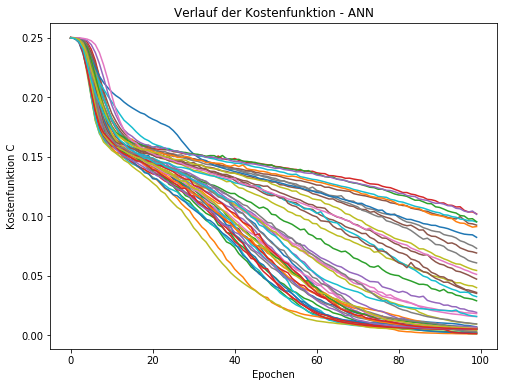

In [12]:
import os
import matplotlib.pyplot as plt

if os.path.exists(path):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename[(len(filename)-3):len(filename)] == 'pkl':
                #print("file: ", filename)
                with open(path + filename, 'rb') as input:
                    ann_net = pickle.load(input)

                    plt.plot(ann_net['history_loss'])
else:
    print('FAIL')

plt.title('Verlauf der Kostenfunktion - ANN')
plt.ylabel('Kostenfunktion C')
plt.xlabel('Epochen')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)

pic_name=create_file_name()+'_bild'
plt.savefig(path + pic_name + '.png')

plt.show()

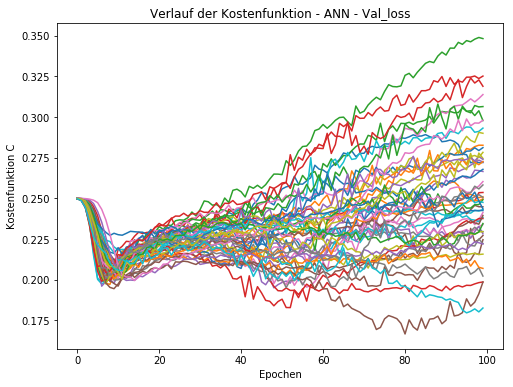

In [13]:
if os.path.exists(path):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename[(len(filename)-3):len(filename)] == 'pkl':
                #print("file: ", filename)
                with open(path + filename, 'rb') as input:
                    ann_net = pickle.load(input)

                    plt.plot(ann_net['history_val_loss'])
else:
    print('FAIL')

plt.title('Verlauf der Kostenfunktion - ANN - Val_loss')
plt.ylabel('Kostenfunktion C')
plt.xlabel('Epochen')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)

pic_name=create_file_name()+'_bild_val_loss'
plt.savefig(path + pic_name + '.png')

plt.show()

In [8]:
def calc_mean(arr, start, stop):
    if start > stop:
        tmp = start
        start = stop
        stop = tmp
    sum = 0
    #print('laenge:', len(arr))
    j = 0
    for i in range(start, stop):
        sum = sum + arr[i]
        j = j + 1
    return (sum / j)


def calc_min(arr, start, stop):
    if start > stop:
        tmp = start
        start = stop
        stop = tmp
    min = 100.0
    j = 0
    for i in range(start, stop):
        if arr[i] < min:
            min = arr[i]
    return min

minimales Netz
0.1665663615830483
19
18
--------------------


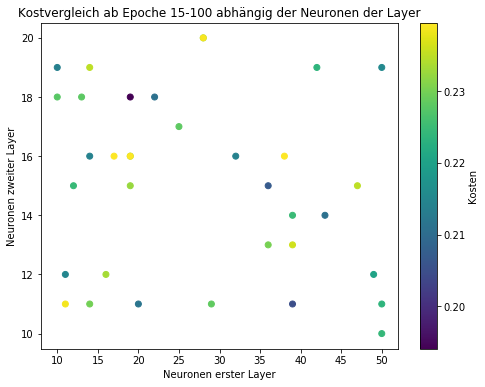

In [16]:
points=[]
min=100
units1_min=0
units2_min=2
if os.path.exists(path):
    for (dirpath, dirnames, filenames) in os.walk(path):
        for filename in filenames:
            if filename[(len(filename)-3):len(filename)] == 'pkl':
                #print("file: ", filename)
                with open(path + filename, 'rb') as input:
                    ann_net = pickle.load(input)
                    temp_mean=calc_mean(ann_net['history_val_loss'],15,100)
                    temp_min=calc_min(ann_net['history_val_loss'],15,100)
                    if temp_min<min:
                        min=temp_min
                        units1_min= ann_net['units1']
                        units2_min= ann_net['units2']
                    if temp_mean<0.24: #ausschneiden
                        pointx=ann_net['units1']
                        pointy=ann_net['units2']
                        pointz=temp_mean
                        pointsrow=[]
                        pointsrow.append(pointx)
                        pointsrow.append(pointy)
                        pointsrow.append(pointz)
                        points.append(pointsrow)
else:
    print('FAIL')

   
print('minimales Netz')
print(min)
print(units1_min)
print(units2_min)
print('--------------------')
    
points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], c=points[:, 2]) #scatter = punktdiagramme
plt.title("Kostvergleich ab Epoche 15-100 abhängig der Neuronen der Layer")
plt.xlabel("Neuronen erster Layer")
plt.ylabel("Neuronen zweiter Layer")
cbar = plt.colorbar()
cbar.set_label("Kosten", labelpad=+2)
figure = plt.gcf()  # get current figure
figure.set_size_inches(8, 6) 
pic_name=create_file_name()+'_bild_Neuronenvergleich'
plt.savefig(path + pic_name + '.png') 
plt.show()